In [1]:
# Test 1:
from sympy import symbols, Function, laplace_transform, diff, Subs
from sympy.solvers import solve


# define variables
t, s, w = symbols("t s w")
x = Function("x")(t)
y = Function("y")(t)
X, Y = symbols("X y")
transform = {
    laplace_transform(x, t, s): X,
    laplace_transform(y, t, s): Y
}


def getTransfunc(diff_eq, order=2):
    init_val_of_y = {
        diff(y, t, i).subs(t, 0): 0
        for i in range(order+1)
    }
    init_val_of_x = {
        diff(x, t, i).subs(t, 0): 0
        for i in range(order+1)
    }

    # apply laplace tranform to each part
    # asume all 0+ equals to zero
    laplace_diff_eq = laplace_transform(diff_eq, t, s).subs(transform)

    # get solution and H(s) = Y(s) / X(s)
    solution = solve(laplace_diff_eq, Y)[0].subs(init_val_of_y).subs(init_val_of_x)
    trans_func = solution / X
    return trans_func

In [2]:
# 1(1)
# diff equation 1
diff_eq_1 = diff(y, t, 2) + diff(y, t) + 25*y - diff(x, t)
order_1 = 2
trans_func_1 = getTransfunc(diff_eq_1, order_1)
trans_func_1

s/(s**2 + s + 25)

In [3]:
import numpy as np
from scipy import signal 
import matplotlib.pyplot as plt


def Test1(num, den, w_log_range, sys_num):
    # create a LTI system
    lti = signal.TransferFunction(num, den)
    fig, axs = plt.subplots(2, 2, figsize=(10, 6))
    fig.suptitle(f"$H_{sys_num}(s)$")

    # calculate frequency response
    w = np.logspace(w_log_range[0], w_log_range[1], 1000)
    w, h = signal.freqresp(lti, w)

    # amplitude response
    amps = np.abs(h)
    axs[0][0].semilogx(w, amps)
    axs[0][0].set_title("Amplitude Response")

    # phase response
    phas = np.angle(h)
    axs[1][0].semilogx(w, phas)
    axs[1][0].set_title("Phase Response")
    axs[1][0].set_xlabel("$log(w)$")

    # real part of frequency response
    reals = h.real
    axs[0][1].semilogx(w, reals)
    axs[0][1].set_title("Real of Frequency Response")

    # imagation part of frequency response
    imags = h.imag
    axs[1][1].semilogx(w, imags)
    axs[1][1].set_title("Imag of Frequency Response")
    axs[1][1].set_xlabel("$log(w)$")


    plt.tight_layout()
    plt.show()

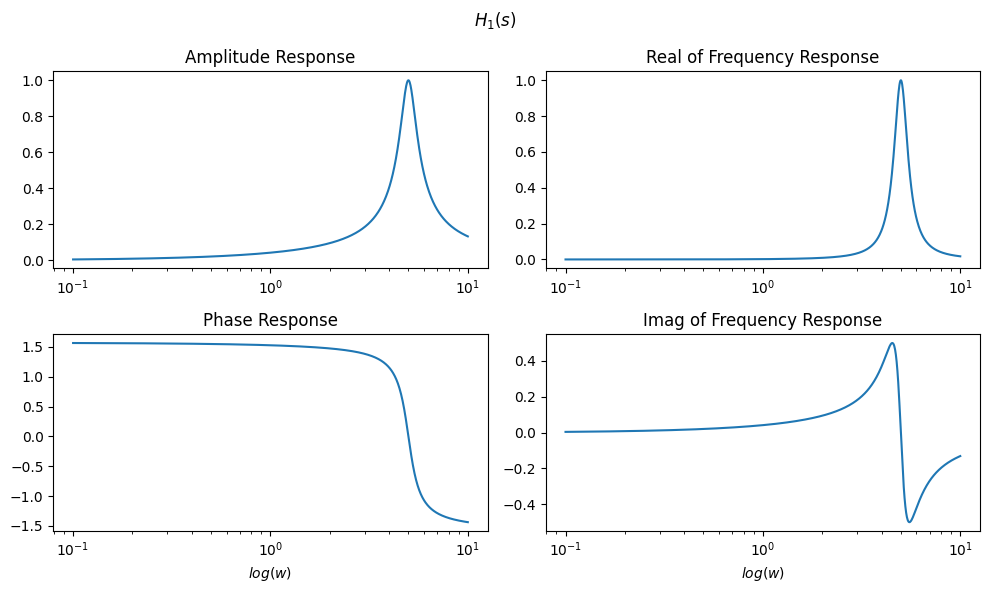

In [4]:
# we actually don't need to calculate trans function
# 1(1)
num1 = [1, 0]           
den1 = [1, 1, 25]

Test1(num1, den1, w_log_range=[-1, 1], sys_num=1)

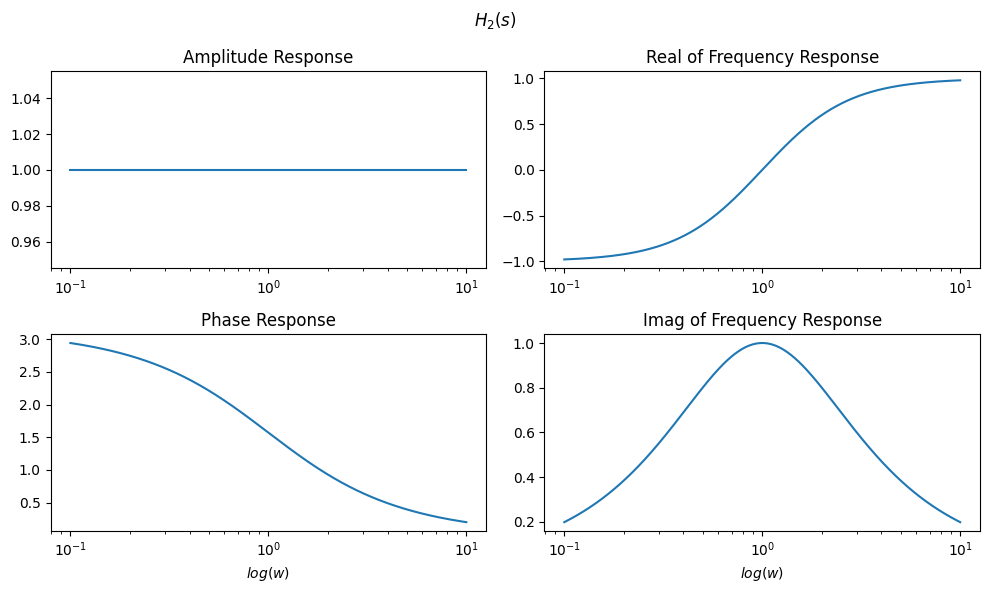

In [5]:
# 1(2)
num2 = [1, -1]
den2 = [1, 1]

Test1(num2, den2, w_log_range=[-1, 1], sys_num=2)

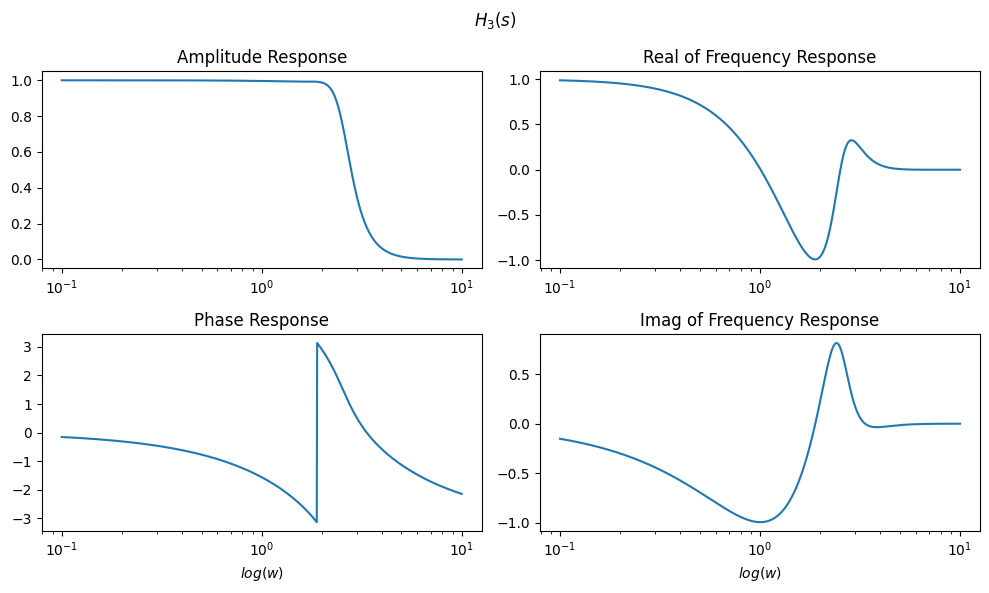

In [6]:
# 1(3)
num3 = [262]
den3 = [1, 10, 48, 148, 306, 401, 262]

Test1(num3, den3, w_log_range=[-1, 1], sys_num=3)

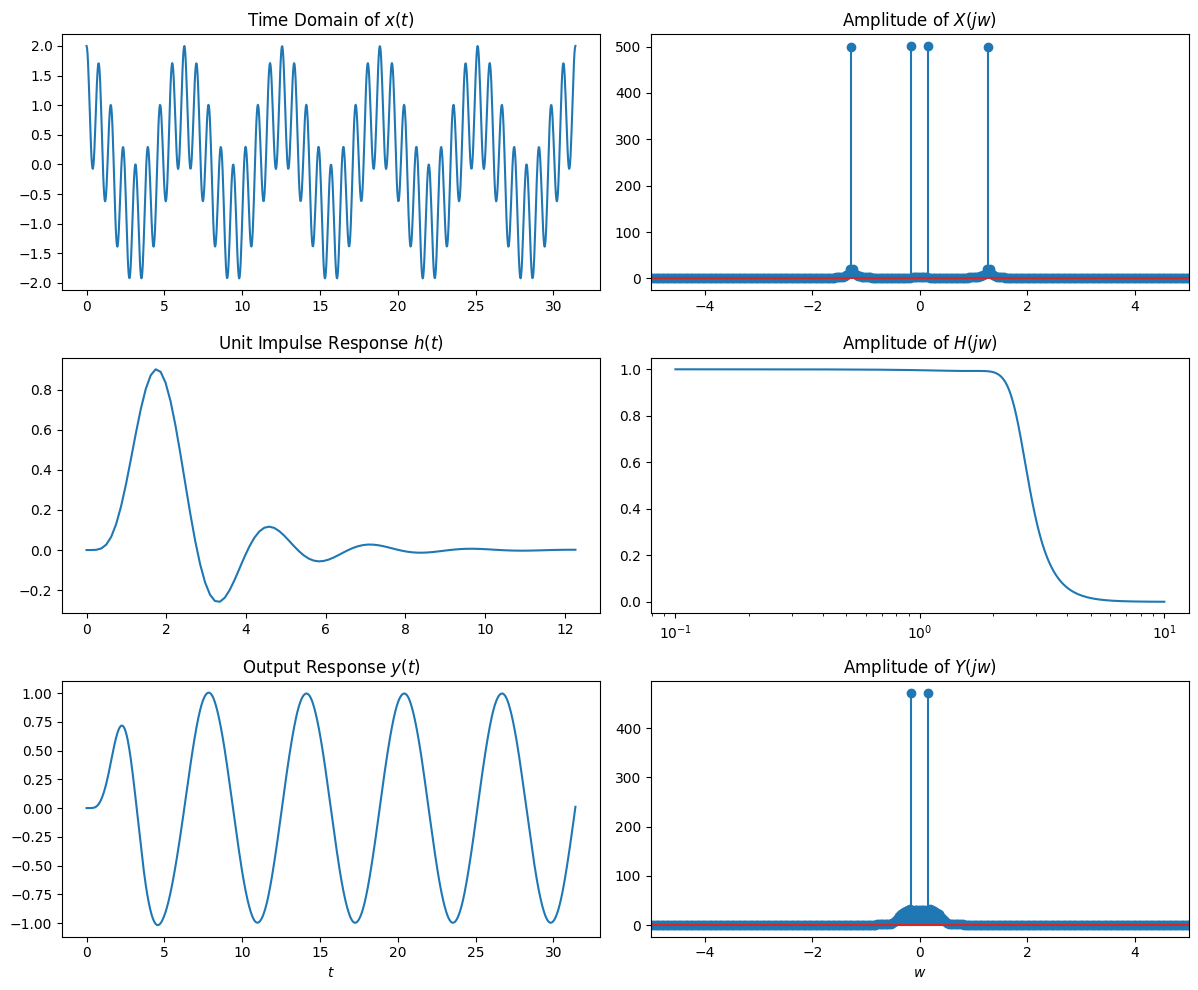

In [7]:
# Test 2
from scipy import fft


# create a LTI system
lti3 = signal.TransferFunction(num3, den3)
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# calculate frequency response
w, h = signal.freqresp(lti3)

# Time domain plot of x(t)
t1 = np.linspace(0, 2*np.pi*5, 1000)
x = np.cos(t1) + np.cos(8*t1)
axs[0][0].plot(t1, x)
axs[0][0].set_title("Time Domain of $x(t)$")

# Amplitude of |X(jw)|
freqs = fft.fftfreq(len(t1), t1[1]-t1[0])
fft_result = fft.fft(x)
xamps = np.abs(fft_result)
axs[0][1].stem(freqs, xamps)
axs[0][1].set_xlim([-5, 5])
axs[0][1].set_title("Amplitude of $X(jw)$")

# unit impulse response
t2, y2 = signal.impulse(lti3)
axs[1][0].plot(t2, y2)
axs[1][0].set_title("Unit Impulse Response $h(t)$")

# Amplitude of |H(jw)|
w = np.logspace(-1, 1, 1000)
w, h = signal.freqresp(lti3, w)
hamps = np.abs(h)
axs[1][1].semilogx(w, hamps)
axs[1][1].set_title("Amplitude of $H(jw)$")

# output response
t3, y3, _ = signal.lsim(lti3, x, t1)
axs[2][0].plot(t3, y3)
axs[2][0].set_title("Output Response $y(t)$")
axs[2][0].set_xlabel("$t$")

# Amplitude of |Y(jw)|
freqs = fft.fftfreq(len(t3), t3[1]-t3[0])
fft_result = fft.fft(y3)
yamps = np.abs(fft_result)
axs[2][1].stem(freqs, yamps)
axs[2][1].set_xlim([-5, 5])
axs[2][1].set_title("Amplitude of $Y(jw)$")
axs[2][1].set_xlabel("$w$")


plt.tight_layout()
plt.show()

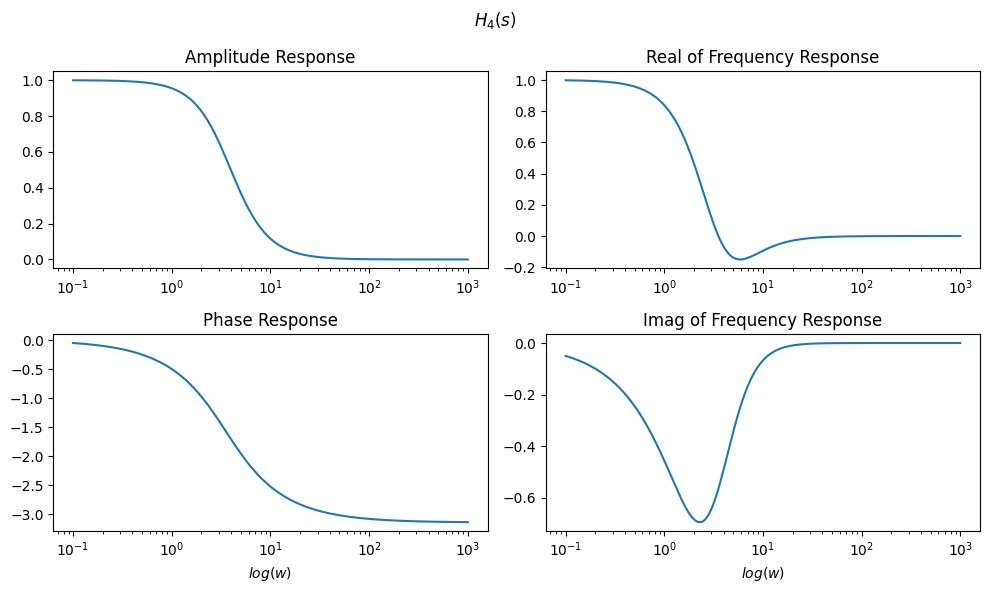

In [8]:
# Test 4
num4 = [1]
den4 = [0.08, 0.5, 1]

Test1(num4, den4, w_log_range=[-1, 3], sys_num=4)

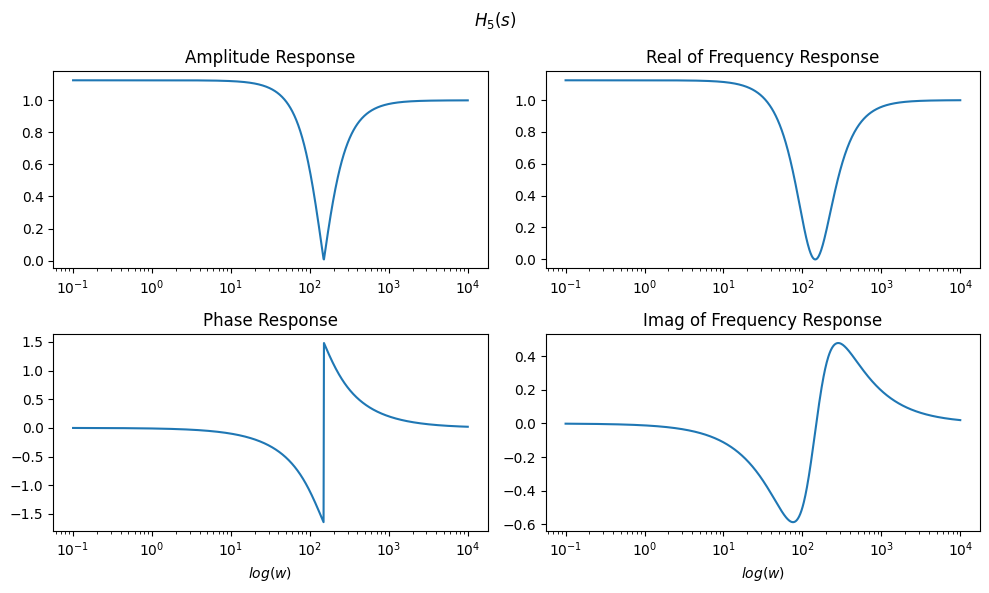

In [9]:
# Test 5
num5 = [1, 0, 22500]
den5 = [1, 200, 20000]

Test1(num5, den5, w_log_range=[-1, 4], sys_num=5)